#  IE 582 Statistical Learning for Data Mining - Homework 3

# Mine Gazioğlu

**Import Packages**

In [1]:
# Importing necessary libraries

import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np # linear algebra
import matplotlib.pyplot as plt # visualization
import matplotlib.pylab as plb # visualization
import seaborn as sns # visualization
import warnings # ignore deprecation warnings etc.
warnings.filterwarnings("ignore") # Ignore warnings
import time # dealing with time data
import datetime as dt # dealing with time data
from sklearn.linear_model import LinearRegression # Linear Regresion
from PIL import Image # to read images
from matplotlib.pyplot import imshow # to display images
import cv2 # Read images
import imageio # Read images

**Load Data**

In [2]:
# Load data with pandas
# Parse date columns "Date" and "Hour"
# Set thousands seperator as ".", decimal seperator as ","

df = pd.read_csv("582/HW3/consumption.csv",encoding='cp1252',parse_dates=[['Tarih', 'Saat']],thousands='.', decimal=',')

In [3]:
# Looking at the first five rows of the data
df.head()

,Tarih_Saat,Tüketim Miktarý (MWh)
0,2016-01-01 00:00:00,26277.24
1,2016-01-01 01:00:00,24991.82
2,2016-01-01 02:00:00,23532.61
3,2016-01-01 03:00:00,22464.78
4,2016-01-01 04:00:00,22002.91


**Change Column Names**

In [4]:
#changing column names "Tarih_Saat"->"Date" & "Tüketim Miktarý (MWh)"->"Consumption Amount(MWh)"

df.rename(columns = {"Tarih_Saat":"Date","Tüketim Miktarý (MWh)":"Consumption Amount(MWh)"},inplace = True)

In [5]:
# Display df with new column names
df.head()

,Date,Consumption Amount(MWh)
0,2016-01-01 00:00:00,26277.24
1,2016-01-01 01:00:00,24991.82
2,2016-01-01 02:00:00,23532.61
3,2016-01-01 03:00:00,22464.78
4,2016-01-01 04:00:00,22002.91


**Taking Care of Missing Data in the Dataset**

In [6]:
# See if there are any null values in the dataframe
df.isnull().sum()

Date                       0
Consumption Amount(MWh)    0
dtype: int64

No null values found

**Other Preprocessing**

In [7]:
# Set Date column as index of the dataframe
df.set_index('Date', inplace=True)

In [8]:
# Set the data type of "Consumption Amount(MWh)" column to float
df["Consumption Amount(MWh)"] = df["Consumption Amount(MWh)"].astype(float)

**Plot Timeseries Graph**

Let's plot a line plot of our time series data

Text(0.5, 1.0, 'Energy Consumtion Time Series')

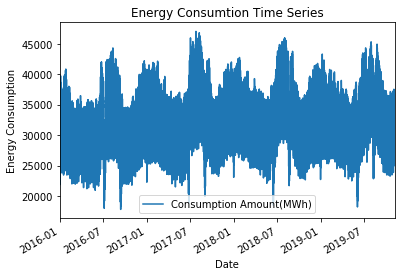

In [9]:
df.plot()
# xlabel
plt.xlabel("Date")
# ylabel
plt.ylabel("Energy Consumption")
# title
plt.title("Energy Consumtion Time Series")

Yearly trends and seasonal patterns are clearly observable. There are no drastic shifts and no obvious outliers observable to the eye.

In [10]:
# Reset index of df dataframe now "Date" is back as a column
df = df.reset_index()

---

# **Questions**

**a) Assume that you are willing to use 168 and 48 hours ago consumption values as your naïve
approaches to predict next day’s consumption. Assume that the test period includes the dates after
1
st of November, 2019 (included). For both approaches, report the summary statistics of MAPE
values for the test period.**


**1.lag48**

In [11]:
# Create and add a column Lag48 that shows consumption 48 hours prior to the date of concern
# Add column Lag_48
df["Lag_48"] = df["Consumption Amount(MWh)"].shift(48)

Since first 2 days don't have a consumption value prior 48 hours we get null values

In [12]:
# Drop rows with any na value
df.dropna(how="any",inplace = True)

**2.lag168**

In [13]:
# Create and add a column Lag48 that shows consumption 168 (1 week) prior to the date of concern
# Add column Lag_168
df["Lag_168"] = df["Consumption Amount(MWh)"].shift(168)

In [14]:
# Drop rows with any na value
df.dropna(how="any",inplace = True)

In [15]:
df.head()

,Date,Consumption Amount(MWh),Lag_48,Lag_168
216,2016-01-10 00:00:00,28890.37,28602.02,27613.96
217,2016-01-10 01:00:00,27133.75,27112.37,25779.28
218,2016-01-10 02:00:00,25656.13,25975.34,24566.31
219,2016-01-10 03:00:00,24937.87,25315.55,23878.42
220,2016-01-10 04:00:00,24538.16,25128.15,23511.38


In [16]:
# Split df into train and test sets
train = df.loc[(df['Date'] >= np.datetime64('2016-01-08 00:00:00')) & (df['Date'] <= np.datetime64('2019-10-31 23:00:00'))]
test = df.loc[(df['Date'] >= np.datetime64('2019-11-01 00:00:00')) & (df['Date'] <= np.datetime64('2019-11-07 23:00:00'))]

**MAPE measurement and comparison for Lag_48 & Lag_168**

We will measure how accurate our naive approach is with MAPE(Mean Absolute Percentage Error)

**MAPE** statistics for **lag48**

MAPE is used to compare the fits of different time series models. Smaller values indicate a better fit.

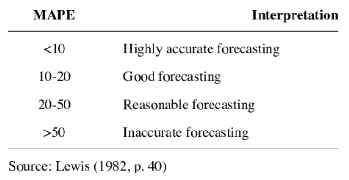

In [17]:
# MAPE values interpretation image
img = (Image.open("582\\HW3\\MAPE_interpretation.png"))
# Display image
plt.imshow(img)
plt.axis("off");

In [18]:
# Define a function to use as our metric of accuracy
def MAPE(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [19]:
# Add MAPE scores as a column for Lag_48
# To apply a function to a dataframe with more than one parameter we need to use np.vectorize

test['MAPE_lag_48'] = np.vectorize(MAPE)(test['Consumption Amount(MWh)'], test['Lag_48'])

In [20]:
test.head()

,Date,Consumption Amount(MWh),Lag_48,Lag_168,MAPE_lag_48
33576,2019-11-01 00:00:00,29417.56,27154.21,29563.43,7.693874
33577,2019-11-01 01:00:00,28133.75,26157.42,28242.90,7.024766
33578,2019-11-01 02:00:00,27358.60,25373.88,27258.74,7.254465
33579,2019-11-01 03:00:00,26780.09,24911.43,26739.84,6.977796
33580,2019-11-01 04:00:00,26511.54,24836.11,26555.35,6.319625


In [21]:
# The Average MAPE score for Lag_48
mape_lag_48 = MAPE(test["Consumption Amount(MWh)"],test["Lag_48"])
print("MAPE of lag48 and the actual value: " +  "%" + str(mape_lag_48))

MAPE of lag48 and the actual value: %8.021723122135358


**Comment on average score:**
<br>
MAPE is a percentage of how our predicted values will deviate from the actual values. <br>
For example, the MAPE is ~%8.021 in our case, the forecast is off by %8.021 for lag48 estimation.<br>
Values that are 0 can affect MAPE and in our case we do not have such values and this seems to be a good prediction.(The table considers MAPE value below 10 to be highly accurate forecasts)

**MAPE** statistics for **lag168**

In [22]:
# Add MAPE scores as a column for Lag_168
# To apply a function to a dataframe with more than one parameter we need to use np.vectorize

test['MAPE_lag_168'] = np.vectorize(MAPE)(test['Consumption Amount(MWh)'], test['Lag_168'])

In [23]:
test.head()

,Date,Consumption Amount(MWh),Lag_48,Lag_168,MAPE_lag_48,MAPE_lag_168
33576,2019-11-01 00:00:00,29417.56,27154.21,29563.43,7.693874,0.495860
33577,2019-11-01 01:00:00,28133.75,26157.42,28242.90,7.024766,0.387968
33578,2019-11-01 02:00:00,27358.60,25373.88,27258.74,7.254465,0.365004
33579,2019-11-01 03:00:00,26780.09,24911.43,26739.84,6.977796,0.150298
33580,2019-11-01 04:00:00,26511.54,24836.11,26555.35,6.319625,0.165249


In [24]:
# # The Average MAPE score for Lag_168
mape_lag_168 = MAPE(test["Consumption Amount(MWh)"],test["Lag_168"])
print("MAPE of lag168 and the actual value: " +  "%" + str(mape_lag_168))

MAPE of lag168 and the actual value: %4.9082818003987665


**Comment on average score:**
<br>
MAPE is %4.90 this time, even a better percentage than estimated for lag48. <br>
Our prediction is off by ~%4.90 percent compared to ~%8.021 for lag48<br>
A smaller percentage suggests less error margin. Less deviation from our actual values.

**f) Compare the results drawing a boxplot of MAPE values for each approach on same plot. Comment on your findings.**

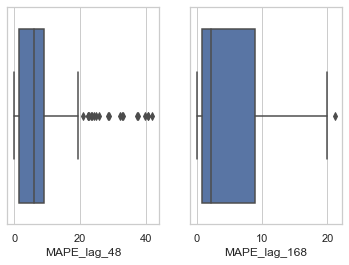

In [25]:
# Let's draw a boxplot to get a good indication of how the values in the data are spread out

import seaborn as sns
sns.set(style="whitegrid")
fig, axes = plt.subplots(1,2)

sns.boxplot( x= "MAPE_lag_48", data=test,  orient='h' , ax=axes[0])
sns.boxplot( x= "MAPE_lag_168", data=test,  orient='h' , ax=axes[1])


How spread out the data is represented by the distance between the mininumum and maximum values of the data which is represented by the ends of the whiskers. Both Lag_48 and Lag_168 are almost equally spread out. However Lag_48 scores are affected by outliers so on average they were 2 times the error margin of Lag_168.(Reference to above average score calculated for Lag_48 and Lag_168 and comments.) Their interquartile ranges are also similary between 0-10. 50 percent of the test data is both 0-10 for both approaches.

In [26]:
# Let's drop Lag_48 and Lag_168 columns as we will recreate them for task b
df.drop(["Lag_48","Lag_168"],axis = 1, inplace = True)

---

**b)  Instead of using the lag consumptions in part (a) as a forecast, we would like to treat them as our
features and build a linear regression model. The illustration of the data format for this prediction
problem is given in Figure 1. This representation is so called “long” format. Train your model using
the data till 1st of November, 2019 and test on the rest. Your linear regression model is expected to
include aforementioned two features (i.e. Lag_48 and Lag_168) and an intercept. Report the
summary statistics of MAPE values for the test period.**

In [27]:
# Let's create a dataframe in a long format with lag48 and lag168 being features

#Lag48
# make a copy of our dataframe and name it long format
# Add column Lag_48
long_format = df.copy()
long_format["Lag_48"] = df["Consumption Amount(MWh)"].shift(48)

#Lag168
# Add column Lag_168
long_format["Lag_168"] = df["Consumption Amount(MWh)"].shift(168)

In [28]:
long_format.head()

,Date,Consumption Amount(MWh),Lag_48,Lag_168
216,2016-01-10 00:00:00,28890.37,NaN,NaN
217,2016-01-10 01:00:00,27133.75,NaN,NaN
218,2016-01-10 02:00:00,25656.13,NaN,NaN
219,2016-01-10 03:00:00,24937.87,NaN,NaN
220,2016-01-10 04:00:00,24538.16,NaN,NaN


In [29]:
# Let's move the locations of the columns in long_format dataframe just for visual purposes

long_format = long_format[["Date","Lag_48","Lag_168","Consumption Amount(MWh)"]]

In [30]:
long_format.head()

,Date,Lag_48,Lag_168,Consumption Amount(MWh)
216,2016-01-10 00:00:00,NaN,NaN,28890.37
217,2016-01-10 01:00:00,NaN,NaN,27133.75
218,2016-01-10 02:00:00,NaN,NaN,25656.13
219,2016-01-10 03:00:00,NaN,NaN,24937.87
220,2016-01-10 04:00:00,NaN,NaN,24538.16


As seen from the dataframe we have NA values resulting from shift.<br>
To fix this we can replace them with mean values of consumption column or remove the lines<br>
We will remove them

In [31]:
# Drop rows with any na value
long_format.dropna(how="any",inplace = True)

In [32]:
long_format.head()

,Date,Lag_48,Lag_168,Consumption Amount(MWh)
384,2016-01-17 00:00:00,29667.03,28890.37,28125.56
385,2016-01-17 01:00:00,27961.70,27133.75,26344.08
386,2016-01-17 02:00:00,26760.14,25656.13,25233.20
387,2016-01-17 03:00:00,26351.43,24937.87,24526.40
388,2016-01-17 04:00:00,26190.00,24538.16,24131.34


In [33]:
# Building a linear regression model
# We will use Lag_48 & Lag_168 columns as our predictors

# Test period includes after 1st November 2019 & train period prior to same date
# Split train and test sets
train = long_format.loc[(long_format['Date'] >= np.datetime64('2016-01-08 00:00:00')) & (long_format['Date'] <= np.datetime64('2019-10-31 23:00:00'))]
test = long_format.loc[(long_format['Date'] >= np.datetime64('2019-11-01 00:00:00')) & (long_format['Date'] <= np.datetime64('2019-11-07 23:00:00'))]

#Seperate feature and target columns for train and test sets
#train
train_X = train[["Lag_48","Lag_168"]]
train_y = train["Consumption Amount(MWh)"]
#test
test_X = test[["Lag_48","Lag_168"]]
test_y = test["Consumption Amount(MWh)"]

# Linear Regression Model

lr = LinearRegression()
# Fit model with train data feature and target
lr.fit(train_X,train_y)
# Predictions
predictions = lr.predict(test_X)

# Add predictions as a column
test["Predictions"] = predictions

# MAPE score
# Add MAPE scores as a column to long_format

test['MAPE_score'] = np.vectorize(MAPE)(test['Consumption Amount(MWh)'], test['Predictions'])

# Average MAPE score
MAPE_score = MAPE(test['Consumption Amount(MWh)'], test['Predictions'])

print(MAPE_score)


5.185415329276748


The average MAPE Score is inbetween the average scores of Lag_48(8.02) and Lag_168(4.90) for the previous task. Still refers to a good prediction since below 10% margin error from the actual values.

In [34]:
test.head()

,Date,Lag_48,Lag_168,Consumption Amount(MWh),Predictions,MAPE_score
33576,2019-11-01 00:00:00,27154.21,29563.43,29417.56,28929.363565,1.659541
33577,2019-11-01 01:00:00,26157.42,28242.90,28133.75,27779.306149,1.259853
33578,2019-11-01 02:00:00,25373.88,27258.74,27358.60,26908.964182,1.643490
33579,2019-11-01 03:00:00,24911.43,26739.84,26780.09,26434.021693,1.292260
33580,2019-11-01 04:00:00,24836.11,26555.35,26511.54,26294.157319,0.819955


**f) Compare the results drawing a boxplot of MAPE values for each approach on same plot. Comment on your findings.**

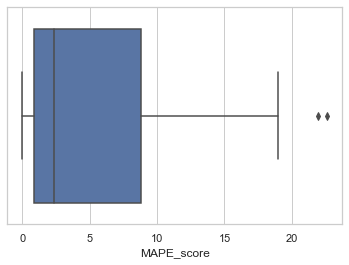

In [35]:
# Let's draw a boxplot to get a good indication of how the values in the data are spread out

import seaborn as sns
sns.set(style="whitegrid")
ax = sns.boxplot(x = test["MAPE_score"])

There are only 2 outlier values which we can tell that our scores are not much effected from the outliers. Our data is right-skewed so that there the values between 0-10 are closer in distance than the values after median. 50% of the data has a score inbetween 0-10. 50% deviate from the actual values 0-10%

---

**c) As mentioned earlier, hourly seasonality is important. Although we used the same hour’s
consumption value of the past days to handle this problem for part (b), we implicitly impose an
assumption that prediction model for each hour has the same coefficients which may not be correct
since the consumption behavior at nights can be different than the other hours. Therefore, modeling
each hour separately is another way to approach to the same problem. Train linear regression models
for each hour using the same training period (24 models) and report your test performance as in part
(a).**

Let's filter all hours seperately 

In [36]:
# Create and hour column to filter each hour easily

long_format["Hour"] = long_format["Date"].dt.hour

# Change the order of the columns

long_format = long_format[["Date","Hour","Lag_48","Lag_168","Consumption Amount(MWh)"]]

In [37]:
# See the changes
long_format.head()

,Date,Hour,Lag_48,Lag_168,Consumption Amount(MWh)
384,2016-01-17 00:00:00,0,29667.03,28890.37,28125.56
385,2016-01-17 01:00:00,1,27961.70,27133.75,26344.08
386,2016-01-17 02:00:00,2,26760.14,25656.13,25233.20
387,2016-01-17 03:00:00,3,26351.43,24937.87,24526.40
388,2016-01-17 04:00:00,4,26190.00,24538.16,24131.34


In [38]:
# Train linear regression models for each hour in a for loop

# hours ranging from 0-23
hours = range(0,24,1)
# create a list to append the MAPE score of the specific hour to this list
hourly_mape_scores = []
# Dictionary to save all dataframes into
hourly_mape_scores_dict = {}
i = 0

# After we train our model for each hour inside the for loop we will use hours and hourly_mape_scores to 
# make a dataframe to display the average MAPE scores for each hour


for hour in range(24):
    # Filter all rows for the specific hour 
    hour_df = long_format[long_format["Hour"] == hour]

    # Building linear regression model for the specific hour
    
    train = hour_df.loc[(hour_df['Date'] >= np.datetime64('2016-01-08 00:00:00')) & (hour_df['Date'] <= np.datetime64('2019-10-31 23:00:00'))]
    test = hour_df.loc[(hour_df['Date'] >= np.datetime64('2019-11-01 00:00:00')) & (hour_df['Date'] <= np.datetime64('2019-11-07 23:00:00'))]

    train_X = train[["Lag_48","Lag_168"]]
    train_y = train["Consumption Amount(MWh)"]

    test_X = test[["Lag_48","Lag_168"]]
    test_y = test["Consumption Amount(MWh)"]

    # Linear Regression 
    lr = LinearRegression()
    # Fit our model with train data for specific hour
    lr.fit(train_X,train_y)
    # predictions of the model
    predictions = lr.predict(test_X)


    # MAPE score
    #calculate MAPE score for the specific hour
    score = MAPE(test_y,predictions)
    # Append each score to hourly_mape_scores list which will give the average score per hour
    hourly_mape_scores.append(score)
    # Add predictions as a column
    test["Predictions"] = predictions
    # Add MAPE scores for each hour as a column
    test['MAPE_score'] = np.vectorize(MAPE)(test['Consumption Amount(MWh)'], test['Predictions'])
    # Save each dataframe in a dict
    hourly_mape_scores_dict[i] = test["MAPE_score"].values
    i += 1
    
# Hourly MAPE scores gives the average MAPE score for each hour
# Create a dataframe from hours and hourly_mape_scores lists
hourly_avgMape_scores_df = pd.DataFrame({"Hour":hours,"MAPE Score": hourly_mape_scores})

In [39]:
# Create a dataframe out of hourly_mape_scores_dict dictionary
hourly_mape_scores_df = pd.DataFrame(hourly_mape_scores_dict)
# Display the DataFrame
hourly_mape_scores_df

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,3.263860,3.058201,3.557968,3.308944,2.738430,3.149746,2.800666,1.953953,2.287296,2.717422,...,6.680841,5.983340,4.787683,2.841892,2.029909,0.433705,0.294431,0.137049,0.175607,0.757691
1,0.151523,0.356826,0.809788,1.018846,0.663872,0.723253,1.223883,0.709894,2.000978,1.685244,...,5.523750,5.759475,4.856220,2.964868,1.766062,1.325777,1.608627,1.399743,1.826113,1.499415
2,1.585109,2.485329,3.652520,3.849056,3.410138,4.076558,4.521523,6.207474,10.999395,13.260167,...,17.007284,15.866077,12.546608,7.178405,3.929228,3.203000,2.500602,2.430385,2.492293,3.219362
3,2.936498,3.155874,1.981667,1.993289,1.251779,0.170796,3.142707,6.344261,7.587481,7.298029,...,7.567728,8.189977,9.627515,10.222181,9.132011,7.283997,7.540041,7.527332,7.807717,7.998024
4,8.183384,8.475053,9.510766,9.697725,9.745287,10.994741,13.488491,17.683455,20.264779,18.815454,...,15.272424,15.244200,15.695147,14.894431,12.308735,10.525147,9.763988,9.285231,9.735941,9.646055
5,8.502078,8.143026,8.130168,8.132764,7.764541,7.802386,7.731540,7.103345,3.062754,0.871889,...,1.786556,1.300835,0.058129,1.074896,1.158471,0.402336,0.096824,0.050497,0.067628,0.054758
6,0.946386,0.684807,0.859892,0.715957,1.017098,0.940849,1.895831,2.596413,1.041546,0.011269,...,2.929052,2.224090,1.142339,0.404064,0.595557,0.688031,0.269834,0.508359,0.521910,0.676781


In [40]:
# Change the names of the columns of hourly_mape_scores_df by "Hour_" prefix
hourly_mape_scores_df.columns = ["Hour_" + str(col) for col in hourly_mape_scores_df.columns]

In [41]:
# Display the dataframe
display(hourly_mape_scores_df)

,Hour_0,Hour_1,Hour_2,Hour_3,Hour_4,Hour_5,Hour_6,Hour_7,Hour_8,Hour_9,...,Hour_14,Hour_15,Hour_16,Hour_17,Hour_18,Hour_19,Hour_20,Hour_21,Hour_22,Hour_23
0,3.263860,3.058201,3.557968,3.308944,2.738430,3.149746,2.800666,1.953953,2.287296,2.717422,...,6.680841,5.983340,4.787683,2.841892,2.029909,0.433705,0.294431,0.137049,0.175607,0.757691
1,0.151523,0.356826,0.809788,1.018846,0.663872,0.723253,1.223883,0.709894,2.000978,1.685244,...,5.523750,5.759475,4.856220,2.964868,1.766062,1.325777,1.608627,1.399743,1.826113,1.499415
2,1.585109,2.485329,3.652520,3.849056,3.410138,4.076558,4.521523,6.207474,10.999395,13.260167,...,17.007284,15.866077,12.546608,7.178405,3.929228,3.203000,2.500602,2.430385,2.492293,3.219362
3,2.936498,3.155874,1.981667,1.993289,1.251779,0.170796,3.142707,6.344261,7.587481,7.298029,...,7.567728,8.189977,9.627515,10.222181,9.132011,7.283997,7.540041,7.527332,7.807717,7.998024
4,8.183384,8.475053,9.510766,9.697725,9.745287,10.994741,13.488491,17.683455,20.264779,18.815454,...,15.272424,15.244200,15.695147,14.894431,12.308735,10.525147,9.763988,9.285231,9.735941,9.646055
5,8.502078,8.143026,8.130168,8.132764,7.764541,7.802386,7.731540,7.103345,3.062754,0.871889,...,1.786556,1.300835,0.058129,1.074896,1.158471,0.402336,0.096824,0.050497,0.067628,0.054758
6,0.946386,0.684807,0.859892,0.715957,1.017098,0.940849,1.895831,2.596413,1.041546,0.011269,...,2.929052,2.224090,1.142339,0.404064,0.595557,0.688031,0.269834,0.508359,0.521910,0.676781


We can see there are 24 columns representing each hour for 7 days

In [42]:
# Display the dataframe that shows hourly average MAPE scores
display(hourly_avgMape_scores_df)

,Hour,MAPE Score
0,0,3.652691
1,1,3.765588
2,2,4.071824
3,3,4.102369
4,4,3.798735
5,5,3.979761
6,6,4.972092
7,7,6.085542
8,8,6.749176
9,9,6.379925


In [43]:
# Let's look at some statistics for the dataframe
hourly_avgMape_scores_df.describe()

,Hour,MAPE Score
count,24.000000,24.000000
mean,11.500000,5.160262
std,7.071068,1.664307
min,0.000000,3.048371
25%,5.750000,3.737364
50%,11.500000,4.694615
75%,17.250000,6.606791
max,23.000000,8.109662


**Comment on average hourly MAPE scores:**
<br>
Mean MAPE score is 5.160108 which is very close to the score(5.184646355316965) we calculated in part (b) where we included all hours in hour model. <br>
Maximum MAPE score is 8.110072 which belongs to 2 pm.<br>
Minimum MAPE score is 3.047911 which belongs to 9 pm.<br>
As the question states each hour has different coefficients thereby the different MAPE scores

In [44]:
# Let's print standard deviations of each hour MAPE scores:
std_dict = {}
i = 0
for column in hourly_mape_scores_df.columns:
    std_dict[i] = hourly_mape_scores_df[column].std()
    i += 1

# Max std in the dictionary
print("Hour with the max std in the dictionary: " +"Hour_"  + str(max(std_dict, key=std_dict.get)))

# Min std in the dictionary
print("Hour with the min std in the dictionary: " +"Hour_"  + str(min(std_dict, key=std_dict.get)))

Hour with the max std in the dictionary: Hour_9
Hour with the min std in the dictionary: Hour_1


**Now let's compare MAPE scores from each hour individually on boxplots as subplots**

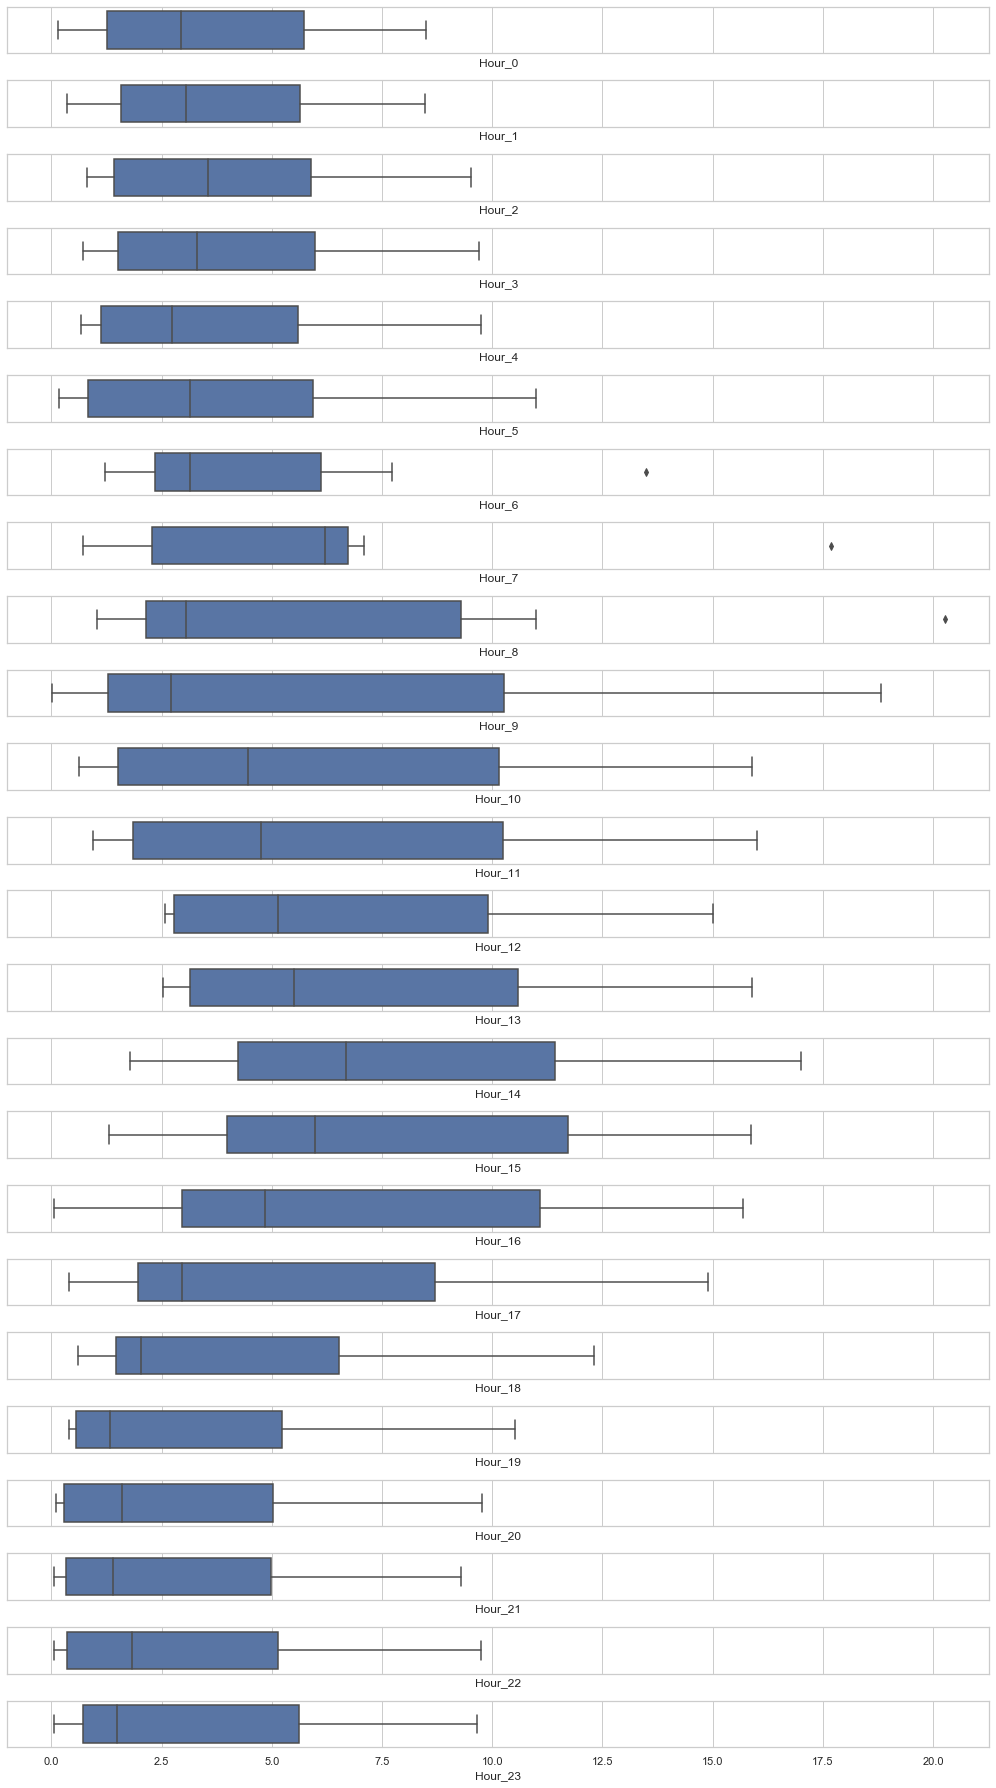

In [45]:
# Let's draw boxplots to get a good indication of how the values in the data are spread out

import seaborn as sns
sns.set(style="whitegrid")
fig, axes = plt.subplots(24,1, figsize = (14,25), sharex = True)
i = 0
# Plot all 24 subplots in a for loop:
for column in hourly_mape_scores_df.columns:
    sns.boxplot( x= column, data=hourly_mape_scores_df,  orient='h' , ax=axes[i])
    i += 1
plt.tight_layout()

These boxplots share the same x axis. So scalability is not a factor to consider interpreting these boxplots. The minimum end is 0 and maximum end is 20 for all subplots. This way we can compare them. Hour 6 seems to have the lowest variance. However, when we manually found out the standard deviations of the hours above hour 1 had the lowest variance. This is because Hour 6 is effected by an outlier. On the contrary hour 9 has the highest distribution of MAPE scores and not affected by any outliers. As we can see we have a variety of MAPE scores that can differ to great extents from the average score in part b). As the question states each hour has a different coefficient as the consumption varies at different parts of the day depending on the necessity.

---

**d) Assume that you have 48 features (hourly consumption from two days ago and last week’s hourly consumption) in total. You are also willing to follow the same logic in part (c) and build a prediction model for each hour separately. Since there is a strong correlation (actually an autocorrelation) between these predictors, you are willing to use penalized regression approaches for modeling. Use L1 penalty in your regression models for each hour. Note that the feature matrix will be the same for all your models, only the target variable will change for this task. In order to determine the regularization parameter (i.e. lambda), perform a 10-fold cross-validation.**
 
**Train penalized regression models with L1 penalty (i.e. lasso regression) for each hour using the same training period (24 models) and report your test performance as in part (a). Also comment on the resulting models (i.e. coefficients and etc.).** 
 

In [46]:
# Melt long_format by Date, Consumption Amount and Hour columns this will elongate Lag_48 and Lag_168 columns by order
pre_wide_format = long_format.melt(id_vars=['Date','Consumption Amount(MWh)', 'Hour'])
pre_wide_format.head()

,Date,Consumption Amount(MWh),Hour,variable,value
0,2016-01-17 00:00:00,28125.56,0,Lag_48,29667.03
1,2016-01-17 01:00:00,26344.08,1,Lag_48,27961.70
2,2016-01-17 02:00:00,25233.20,2,Lag_48,26760.14
3,2016-01-17 03:00:00,24526.40,3,Lag_48,26351.43
4,2016-01-17 04:00:00,24131.34,4,Lag_48,26190.00


In [47]:
# Add "_hour" suffix for each hour to variable column as we will use this column as column headers later
pre_wide_format["variable"] += "_hour" + pre_wide_format["Hour"].astype(str)

In [48]:
pre_wide_format.head()

,Date,Consumption Amount(MWh),Hour,variable,value
0,2016-01-17 00:00:00,28125.56,0,Lag_48_hour0,29667.03
1,2016-01-17 01:00:00,26344.08,1,Lag_48_hour1,27961.70
2,2016-01-17 02:00:00,25233.20,2,Lag_48_hour2,26760.14
3,2016-01-17 03:00:00,24526.40,3,Lag_48_hour3,26351.43
4,2016-01-17 04:00:00,24131.34,4,Lag_48_hour4,26190.00


In [49]:
# Let's pivot our dataframe into a wider format

wide_format = pre_wide_format.pivot_table(index = ["Date","Consumption Amount(MWh)"], columns = "variable", values = "value").reset_index()
wide_format.head()

# Fill NA values in Date column with first value before NA's

wide_format = wide_format.groupby(wide_format['Date'].dt.date).apply(lambda x: x.ffill().bfill())

In [50]:
# We have the desired wide format but columns are not in the right order
# Just to mirror the visual representation given in the homework we should reorder the columns
wide_format.head()

variable,Date,Consumption Amount(MWh),Lag_168_hour0,Lag_168_hour1,Lag_168_hour10,Lag_168_hour11,Lag_168_hour12,Lag_168_hour13,Lag_168_hour14,Lag_168_hour15,...,Lag_48_hour21,Lag_48_hour22,Lag_48_hour23,Lag_48_hour3,Lag_48_hour4,Lag_48_hour5,Lag_48_hour6,Lag_48_hour7,Lag_48_hour8,Lag_48_hour9
0,2016-01-17 00:00:00,28125.56,28890.37,27133.75,28136.07,29059.35,28947.35,28944.66,29089.83,29447.75,...,33140.33,33272.46,31803.26,26351.43,26190.0,26646.35,27845.52,29266.49,33637.71,36386.28
1,2016-01-17 01:00:00,26344.08,28890.37,27133.75,28136.07,29059.35,28947.35,28944.66,29089.83,29447.75,...,33140.33,33272.46,31803.26,26351.43,26190.0,26646.35,27845.52,29266.49,33637.71,36386.28
2,2016-01-17 02:00:00,25233.20,28890.37,27133.75,28136.07,29059.35,28947.35,28944.66,29089.83,29447.75,...,33140.33,33272.46,31803.26,26351.43,26190.0,26646.35,27845.52,29266.49,33637.71,36386.28
3,2016-01-17 03:00:00,24526.40,28890.37,27133.75,28136.07,29059.35,28947.35,28944.66,29089.83,29447.75,...,33140.33,33272.46,31803.26,26351.43,26190.0,26646.35,27845.52,29266.49,33637.71,36386.28
4,2016-01-17 04:00:00,24131.34,28890.37,27133.75,28136.07,29059.35,28947.35,28944.66,29089.83,29447.75,...,33140.33,33272.46,31803.26,26351.43,26190.0,26646.35,27845.52,29266.49,33637.71,36386.28


In [51]:
# Column names seem to be unordered manually fix them
wide_format = wide_format[["Date",'Lag_168_hour0', 'Lag_168_hour1',
       'Lag_168_hour2', 'Lag_168_hour3', 'Lag_168_hour4', 'Lag_168_hour5',
       'Lag_168_hour6', 'Lag_168_hour7', 'Lag_168_hour8', 'Lag_168_hour9',
       'Lag_168_hour10', 'Lag_168_hour11', 'Lag_168_hour12', 'Lag_168_hour13',
       'Lag_168_hour14', 'Lag_168_hour15', 'Lag_168_hour16', 'Lag_168_hour17',
       'Lag_168_hour18', 'Lag_168_hour19', 'Lag_168_hour20', 'Lag_168_hour21',
       'Lag_168_hour22', 'Lag_168_hour23', 'Lag_48_hour0', 'Lag_48_hour1',
       'Lag_48_hour2', 'Lag_48_hour3', 'Lag_48_hour4', 'Lag_48_hour5',
       'Lag_48_hour6', 'Lag_48_hour7', 'Lag_48_hour8', 'Lag_48_hour9',
       'Lag_48_hour10', 'Lag_48_hour11', 'Lag_48_hour12', 'Lag_48_hour13',
       'Lag_48_hour14', 'Lag_48_hour15', 'Lag_48_hour16', 'Lag_48_hour17',
       'Lag_48_hour18', 'Lag_48_hour19', 'Lag_48_hour20', 'Lag_48_hour21',
       'Lag_48_hour22', 'Lag_48_hour23',"Consumption Amount(MWh)"]]

In [52]:
# Check for results
wide_format.head()

variable,Date,Lag_168_hour0,Lag_168_hour1,Lag_168_hour2,Lag_168_hour3,Lag_168_hour4,Lag_168_hour5,Lag_168_hour6,Lag_168_hour7,Lag_168_hour8,...,Lag_48_hour15,Lag_48_hour16,Lag_48_hour17,Lag_48_hour18,Lag_48_hour19,Lag_48_hour20,Lag_48_hour21,Lag_48_hour22,Lag_48_hour23,Consumption Amount(MWh)
0,2016-01-17 00:00:00,28890.37,27133.75,25656.13,24937.87,24538.16,24616.05,24478.14,23813.35,24676.92,...,35343.51,36473.19,37425.77,36019.98,34574.97,33756.4,33140.33,33272.46,31803.26,28125.56
1,2016-01-17 01:00:00,28890.37,27133.75,25656.13,24937.87,24538.16,24616.05,24478.14,23813.35,24676.92,...,35343.51,36473.19,37425.77,36019.98,34574.97,33756.4,33140.33,33272.46,31803.26,26344.08
2,2016-01-17 02:00:00,28890.37,27133.75,25656.13,24937.87,24538.16,24616.05,24478.14,23813.35,24676.92,...,35343.51,36473.19,37425.77,36019.98,34574.97,33756.4,33140.33,33272.46,31803.26,25233.20
3,2016-01-17 03:00:00,28890.37,27133.75,25656.13,24937.87,24538.16,24616.05,24478.14,23813.35,24676.92,...,35343.51,36473.19,37425.77,36019.98,34574.97,33756.4,33140.33,33272.46,31803.26,24526.40
4,2016-01-17 04:00:00,28890.37,27133.75,25656.13,24937.87,24538.16,24616.05,24478.14,23813.35,24676.92,...,35343.51,36473.19,37425.77,36019.98,34574.97,33756.4,33140.33,33272.46,31803.26,24131.34


In [53]:
# For each hour we will train our model with the last 48 hours and 168 hours for all hours as our features
# We have a total of 48 features

# hours ranging from 0-23
hours = range(0,24,1)
# List to keep average MAPE scores for each hour
lasso_hourly_avgMape_scores = []
# Dictionary to save all the resulting dataframes into
features_48_mape_scores = {}
# Dictionary to save coefficients of the features per dataframe
coefficients = {}
i = 0

# Create an hour column for wide_format dataframe
wide_format["Hour"] = wide_format["Date"].dt.hour

for hour in range(24):
    
    # Filter all rows for the specific hour 
    hour_df = wide_format[wide_format["Hour"] == hour]

    train = hour_df.loc[(hour_df['Date'] >= np.datetime64('2016-01-08 00:00:00')) & (hour_df['Date'] <= np.datetime64('2019-10-31 23:00:00'))]
    test = hour_df.loc[(hour_df['Date'] >= np.datetime64('2019-11-01 00:00:00')) & (hour_df['Date'] <= np.datetime64('2019-11-07 23:00:00'))]

    # split train to feature and target 
    train_X = train.iloc[:,1:49]
    train_y = train["Consumption Amount(MWh)"]

    #split train to feature and target
    test_X = test.iloc[:,1:49]
    test_y = test["Consumption Amount(MWh)"]

    from sklearn.linear_model import LassoCV
    from sklearn.model_selection import KFold

    # perform 10 fold cross validation
    kf=KFold(n_splits=10,shuffle=True)
    lasso=LassoCV(cv=kf)
    # Fit train datasets
    lasso.fit(train_X,train_y)

    # predict

    predictions = lasso.predict(test_X)

    # Average MAPE score

    hourly_mape_score = MAPE(test_y,predictions)
    lasso_hourly_avgMape_scores.append(hourly_mape_score)
    
    # Add predictions as a column
    test["Predictions"] = predictions
    # Add MAPE scores for each hour as a column
    test['MAPE_score'] = np.vectorize(MAPE)(test['Consumption Amount(MWh)'], test['Predictions'])
    # Save each dataframe in a dict
    features_48_mape_scores[i] = test["MAPE_score"].values
    # Save coefficients
    coefficients[i] = lasso.coef_
    i += 1
    
# Create a dataframe from hours and hourly_mape_scores lists that shows hourly average MAPE scores
lasso_hourly_mape_scores_df = pd.DataFrame({"Hour":hours,"MAPE Score": lasso_hourly_avgMape_scores})

# Create a dataframe out of features_48_mape_scores dictionary
features_48_mape_scores_df = pd.DataFrame(features_48_mape_scores)
# Change the names of the columns of features_48_mape_scores_df by "Hour_" prefix
features_48_mape_scores_df.columns = ["Hour_" + str(col) for col in features_48_mape_scores_df.columns]

In [54]:
# Display average MAPE scores for each hour
display(lasso_hourly_mape_scores_df)

,Hour,MAPE Score
0,0,1.651154
1,1,1.584711
2,2,1.734667
3,3,1.708507
4,4,1.562448
5,5,1.523323
6,6,1.643267
7,7,2.231469
8,8,3.683779
9,9,4.266373


In [55]:
# Let's view some basic statistical details
lasso_hourly_mape_scores_df.describe()

,Hour,MAPE Score
count,24.000000,24.000000
mean,11.500000,2.822792
std,7.071068,1.402163
min,0.000000,1.523323
25%,5.750000,1.676654
50%,11.500000,1.911427
75%,17.250000,4.337836
max,23.000000,5.313954


**Comment on average hourly MAPE scores:**
<br>
Mean MAPE score is 2.822792 which indicates improvement compared to our average score over all hours(5.160262) we calculated in part (c) <br>
This means on average our predictions deviate only ~%2.8 from the actual consumption values
<br>
Maximum average MAPE score is 5.313954 which belongs to 14 pm.<br>
Minimum average MAPE score is 1.523323 which belongs to 5 am.<br>
As the question states each hour has different coefficients thereby the different MAPE scores

In [56]:
# Display the dataframe that shows hourly MAPE scores
display(features_48_mape_scores_df)

,Hour_0,Hour_1,Hour_2,Hour_3,Hour_4,Hour_5,Hour_6,Hour_7,Hour_8,Hour_9,...,Hour_14,Hour_15,Hour_16,Hour_17,Hour_18,Hour_19,Hour_20,Hour_21,Hour_22,Hour_23
0,1.849037,1.593814,1.680313,1.718699,2.198200,1.518016,1.565905,1.900726,1.037581,0.167070,...,4.462918,3.721578,1.900963,0.237382,1.093316,1.854783,0.951924,1.694163,1.683227,1.106336
1,0.532708,0.097794,0.760324,0.724803,0.209656,0.147235,0.351431,0.176013,0.017974,0.355385,...,2.054998,2.362920,2.009157,1.292573,0.749454,0.136302,0.507550,0.562212,0.197352,0.556708
2,1.520574,1.543816,2.236521,1.994451,1.666083,2.142115,2.385723,4.075470,8.420844,10.303398,...,11.966402,10.729904,7.947547,4.185628,1.216415,0.678340,0.549639,0.856778,0.041489,0.198038
3,3.873002,3.583447,3.098215,3.081732,2.607942,2.139563,1.406839,0.847351,1.925234,2.534724,...,1.063383,0.560127,0.533762,1.465780,1.468517,0.856465,1.828984,1.798883,1.657377,2.283809
4,2.255901,2.705404,3.249963,3.289931,3.172856,3.889226,5.174492,6.906132,7.168553,4.538150,...,1.433583,1.776762,2.827333,2.266622,1.558169,1.073091,1.405430,0.875508,1.284022,1.717843
5,0.749625,0.871364,0.844280,0.710949,0.781143,0.458350,0.304961,1.469761,5.950439,8.670529,...,11.010600,10.336466,8.650570,7.348586,5.715379,5.496540,4.978652,5.331487,5.364162,4.775900
6,0.777235,0.697340,0.273050,0.438980,0.301254,0.368754,0.313520,0.244831,1.265826,3.295357,...,5.205797,4.685263,3.661585,2.757825,2.354000,2.109990,1.288892,1.485703,1.619559,1.157439


In [57]:
# Let's print standard deviations of each hour MAPE scores:
std_dict = {}
i = 0
for column in features_48_mape_scores_df.columns:
    std_dict[i] = features_48_mape_scores_df[column].std()
    i += 1

# Max std in the dictionary
print("Hour with the max std in the dictionary: " +"Hour_"  + str(max(std_dict, key=std_dict.get)))

# Min std in the dictionary
print("Hour with the min std in the dictionary: " +"Hour_"  + str(min(std_dict, key=std_dict.get)))

Hour with the max std in the dictionary: Hour_13
Hour with the min std in the dictionary: Hour_3


**Now let's compare MAPE scores from each hour individually on boxplots as subplots**

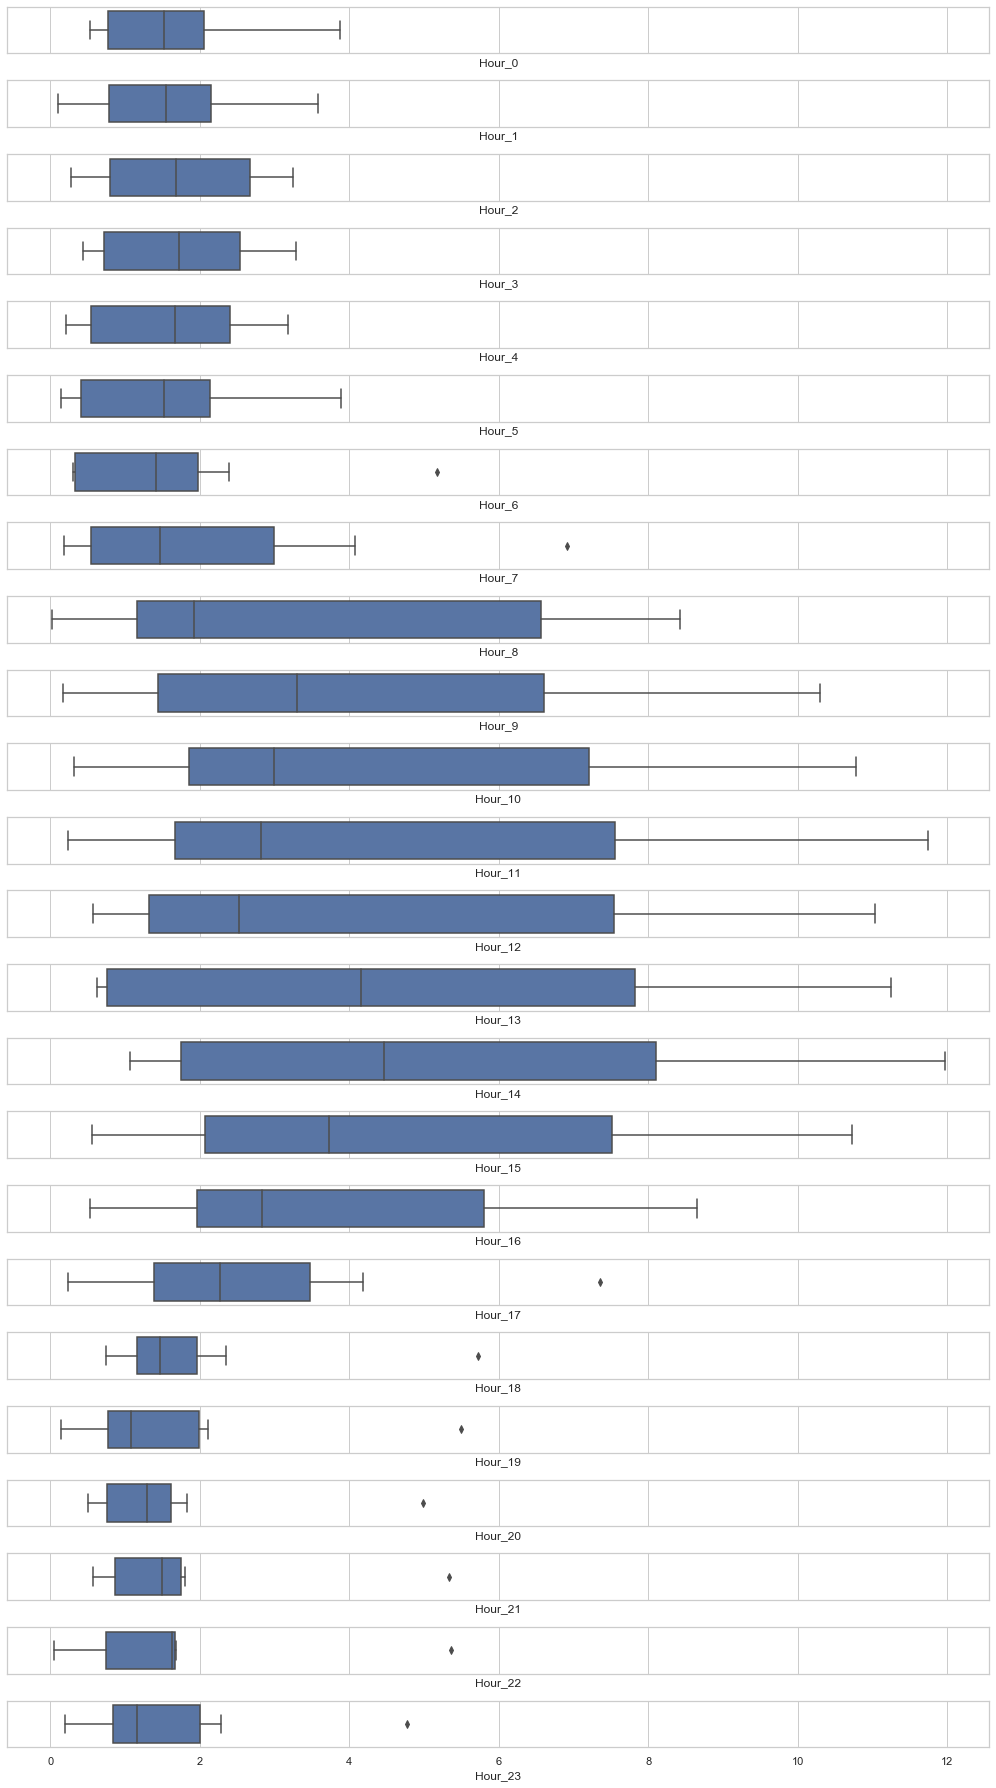

In [58]:
# Let's draw boxplots to get a good indication of how the values in the data are spread out

import seaborn as sns
sns.set(style="whitegrid")
fig, axes = plt.subplots(24,1, figsize = (14,25), sharex = True)
i = 0
# Plot all 24 subplots in a for loop:
for column in features_48_mape_scores_df.columns:
    sns.boxplot( x= column, data=features_48_mape_scores_df,  orient='h' , ax=axes[i])
    i += 1
plt.tight_layout()

These boxplots share the same x axis. So scalability is not a factor to consider interpreting these boxplots. The minimum end is 0 and maximum end is 12 for all subplots. This way we can compare them. Hour 3 has the lowest variance. On the contrary hour 13 has the highest variance of MAPE scores. As we can see we have a variety of MAPE scores that can differ to great extents from the average score in part c). As the question states each hour has a different coefficients as the consumption varies at different parts of the day depending on the necessity. Also, we notice a decrease in the error margin with using L1 penalty in our regression model. The error margin is almost halved compared to part c). This approach seems to be more efficient than our previous efforts.

In [59]:
# Coefficients interpretation
# Display coefficient dictionary
print(coefficients)

{0: array([ 6.18958853e-02,  0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  1.70369250e-01,  1.64672596e-01,
       -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  1.19336131e-01,  0.00000000e+00,
        0.00000000e+00, -0.00000000e+00, -1.33242878e-02, -2.38167113e-01,
       -1.87258868e-01, -0.00000000e+00, -3.99468817e-02, -0.00000000e+00,
       -1.99040854e-01, -8.28196397e-02, -0.00000000e+00,  0.00000000e+00,
        2.65400780e-02,  0.00000000e+00,  0.00000000e+00,  3.95696321e-01,
       -0.00000000e+00, -5.92645624e-01, -1.85863831e-01, -1.14823071e-01,
        0.00000000e+00,  3.96872664e-01, -2.54870737e-02,  0.00000000e+00,
        1.82559702e-02,  0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00,  3.65480425e-04,  2.29934070e-01,  1.10632416e+00]), 1: array([ 0.        ,  0.03733572,  0.        ,  0.        ,  0.        ,
        0.        ,

---

As can be seen for each dataframe we created belonging to each hour we have 48 coefficients.<br>
Let's turn the dictionary into a dataframe that contains each hour as columns and 48 feature coefficients as rows.

In [67]:
# Create a dataframe out of coefficients dictionary
coefficient_df = pd.DataFrame(coefficients)
# Since index of the coefficient_df shows the feautures let's replace them with the names of the feature columns
coefficient_df.index = ['Lag_168_hour0', 'Lag_168_hour1',
       'Lag_168_hour2', 'Lag_168_hour3', 'Lag_168_hour4', 'Lag_168_hour5',
       'Lag_168_hour6', 'Lag_168_hour7', 'Lag_168_hour8', 'Lag_168_hour9',
       'Lag_168_hour10', 'Lag_168_hour11', 'Lag_168_hour12', 'Lag_168_hour13',
       'Lag_168_hour14', 'Lag_168_hour15', 'Lag_168_hour16', 'Lag_168_hour17',
       'Lag_168_hour18', 'Lag_168_hour19', 'Lag_168_hour20', 'Lag_168_hour21',
       'Lag_168_hour22', 'Lag_168_hour23', 'Lag_48_hour0', 'Lag_48_hour1',
       'Lag_48_hour2', 'Lag_48_hour3', 'Lag_48_hour4', 'Lag_48_hour5',
       'Lag_48_hour6', 'Lag_48_hour7', 'Lag_48_hour8', 'Lag_48_hour9',
       'Lag_48_hour10', 'Lag_48_hour11', 'Lag_48_hour12', 'Lag_48_hour13',
       'Lag_48_hour14', 'Lag_48_hour15', 'Lag_48_hour16', 'Lag_48_hour17',
       'Lag_48_hour18', 'Lag_48_hour19', 'Lag_48_hour20', 'Lag_48_hour21',
       'Lag_48_hour22', 'Lag_48_hour23']

In [68]:
# Display the dataframe
display(coefficient_df)

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Lag_168_hour0,0.061896,0.000000,0.000000,-0.000000,-0.000000,-0.000000,-0.019216,-0.000000,0.000000,0.000000,...,0.046785,0.000679,0.000351,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.053894
Lag_168_hour1,0.000000,0.037336,0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.000000,0.000000,...,0.086854,0.098882,0.051492,0.005327,0.000000,0.000000,0.018310,0.061235,0.025207,0.000000
Lag_168_hour2,-0.000000,0.000000,0.000000,-0.001341,-0.022547,-0.101915,-0.084283,-0.000000,-0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Lag_168_hour3,-0.000000,0.000000,0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.000000,0.000000,...,0.003909,0.090210,0.154008,0.137199,0.032700,0.014794,0.000000,0.026910,0.002905,0.000000
Lag_168_hour4,0.000000,0.000000,0.010036,-0.000000,-0.000000,-0.000000,-0.138353,-0.204555,-0.059714,-0.000000,...,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000
Lag_168_hour5,0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,-0.220300,-0.540723,-1.063159,-1.193359,...,-1.216271,-1.269786,-1.338518,-1.208096,-0.900697,-0.760324,-0.693919,-0.771917,-0.656713,-0.689563
Lag_168_hour6,0.170369,0.140157,0.086111,0.078481,0.115297,0.202847,0.341927,0.000000,0.000000,0.000000,...,-0.000000,-0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,0.000000,0.000000
Lag_168_hour7,0.164673,0.196625,0.259063,0.262884,0.264883,0.290575,0.541669,1.033468,0.824506,0.756047,...,0.512803,0.528670,0.582332,0.593773,0.579458,0.535987,0.441146,0.397280,0.382706,0.459365
Lag_168_hour8,-0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.142178,0.722854,0.666014,...,0.544496,0.549002,0.558847,0.466789,0.309082,0.284390,0.307160,0.338953,0.312321,0.227065
Lag_168_hour9,-0.000000,-0.014660,-0.017527,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.000000,0.094790,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


The sign of a regression coefficient tells you whether there is a positive or negative correlation between each independent variable the dependent variable. A positive coefficient indicates that as the value of the independent variable increases, the mean of the dependent variable also tends to increase. A negative coefficient suggests that as the independent variable increases, the dependent variable tends to decrease.We can observe certain correlation patterns for some features.For example for Lag_48_hour23 feature we have a positive and strong correlation since all the values along that row for each hour has very high coefficients compared to other features. We can say that Lag_48_hour23 has a big effect on our predictions. Similarly features Lag_48_hour9 and Lag_48_hour11 have negative coefficients along all hours and they negatively affect our predictions. 